# LOAN STATUS PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\meenu\Downloads\train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)


categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Dependents']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  


In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [8]:

value_counts = df['Dependents'].value_counts()

print(value_counts)


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [9]:
df['Dependents'] = df['Dependents'].replace('3+', '3') 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


#### Data visualisation

<Axes: xlabel='Education', ylabel='count'>

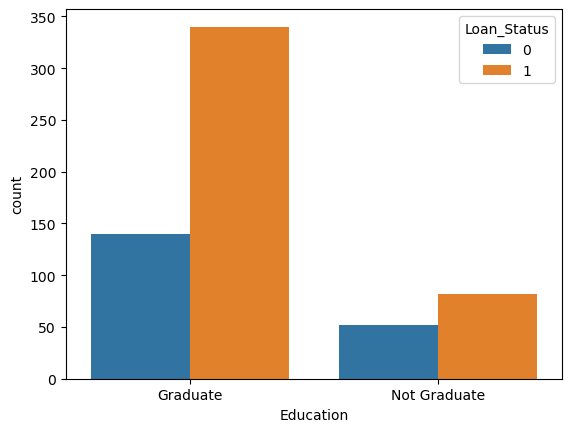

In [10]:
#relation between education and loan status

sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

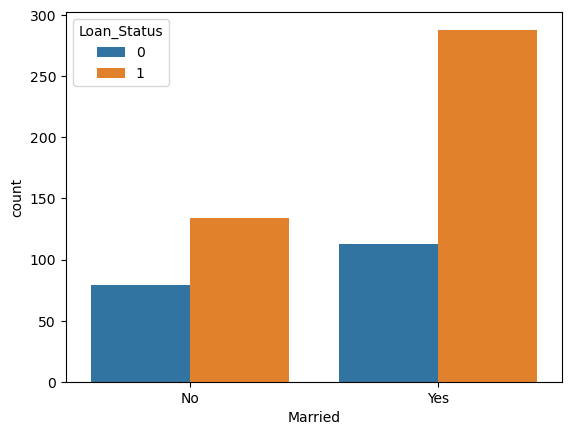

In [11]:
#relation btw married and loan status

sns.countplot(x='Married',hue='Loan_Status',data=df)

In [12]:
#converting all categorical columns into numerical

df.replace({'Married': {'No': 0, 'Yes': 1},'Gender': {'Male': 1, 'Female': 0},'Self_Employed': {'No': 0, 'Yes': 1},'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2},'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [13]:
#separating label and target variables before creating model
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [14]:
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [15]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)


In [16]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (552, 11) (62, 11)


In [17]:
#Training the SVM Model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))


# Train the SVM classifier
svm_classifier.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [18]:
from sklearn.metrics import accuracy_score

# Predict outcomes on the test set
y_pred = svm_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {'svc__C': [0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'rbf', 'poly']}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Re-train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")


Best Parameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Best Model Accuracy: 0.82


#### Prediction using test file

In [20]:
test_df = pd.read_csv(r"C:\Users\meenu\Downloads\test_lAUu6dG.csv")
test_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [22]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    test_df[col].fillna(test_df[col].mean(), inplace=True)


categorical_columns = ['Gender', 'Self_Employed','Dependents']
for col in categorical_columns:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)  


In [24]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
value_counts = test_df['Dependents'].value_counts()

print(value_counts)


0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [26]:
test_df['Dependents'] = test_df['Dependents'].replace('3+', '3') 
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [27]:
#converting all categorical columns into numerical

test_df.replace({'Married': {'No': 0, 'Yes': 1},'Gender': {'Male': 1, 'Female': 0},'Self_Employed': {'No': 0, 'Yes': 1},'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2},'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.000000,0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.000000,0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.000000,0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0.825444,0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.000000,0
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.000000,0
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,0.825444,2
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.000000,1


In [28]:
# Prepare X_new_test for prediction by dropping unnecessary columns
X_new_test = test_df.drop(columns=['Loan_ID'], axis=1)

# Display or use X_new_test for prediction with your trained SVM model
print(X_new_test)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          0          1              0             5720   
1         1        1          1          1              0             3076   
2         1        1          2          1              0             5000   
3         1        1          2          1              0             2340   
4         1        0          0          0              0             3276   
..      ...      ...        ...        ...            ...              ...   
362       1        1          3          0              1             4009   
363       1        1          0          1              0             4158   
364       1        0          0          1              0             3250   
365       1        1          0          1              0             5000   
366       1        0          0          1              1             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [29]:
# Predict using the trained model
predictions = svm_classifier.predict(X_new_test)

# Show the predictions
print(predictions)


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
# Convert numerical predictions to 'Y' or 'N'
predictions_str = ['Y' if pred == 1 else 'N' for pred in predictions]

# Combine Loan_ID with predictions
results = pd.DataFrame({'Loan_ID': test_df['Loan_ID'], 'Loan_Status': predictions_str})

# Save the results to a CSV file
results.to_csv('predicted_loan_status_submission.csv', index=False)


In [31]:
print(results)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]
